# FRE7841 Hedge Fund Strategies: Final Project Fall 2025

Team members:

- Joaquin Garay
- Juan Camilo Meneses
- Charles Wu

December 6th, 2025

# Carry-trend strategy on US SOFR Forward Swap Curve using PCA

## General description

Our strategy aims to generate P&L from carry in the US SOFR Forward Swap yield curve. The strategy aims to be neutral to level shifts in the yield curve, and benefit from rolling across the slope of the curve (forward or spot), based on long-run deviations from mean level.

### Data

We use daily constant maturity SOFR swap rates from Jan 31st, 2021- October 31st to construct our PCA analysis,

### Strategy setp-up

The next steps describe our approach:



1.   Data
2.   List item

# PCA Analysis


In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import module_joaquin as mod

In [2]:
spot_df = pd.read_csv("data/spot_sofr.csv",
                      parse_dates=["Dates"], header=0)
spot_df = spot_df.set_index("Dates")
spot_df = spot_df.apply(pd.to_numeric, errors="coerce").dropna()
print("Start date in sample = {t}".format(t = spot_df.index[0].strftime("%A, %B %d, %Y")))
print("End date in sample = {t}".format(t = spot_df.index[-1].strftime("%A, %B %d, %Y")))
print("Number of daily observations = {n}".format(n = spot_df.shape[0]))
print("Number of maturities = {m}".format(m = spot_df.shape[1]))
print("Maturities = {ml}".format(ml = list(spot_df.columns)))

Start date in sample = Friday, January 01, 2021
End date in sample = Friday, October 31, 2025
Number of daily observations = 1227
Number of maturities = 30
Maturities = ['1W', '2W', '3W', '1M', '2M', '3M', '4M', '5M', '6M', '7M', '8M', '9M', '10M', '11M', '12M', '18M', '2Y', '3Y', '4Y', '5Y', '6Y', '7Y', '8Y', '9Y', '10Y', '12Y', '15Y', '20Y', '25Y', '30Y']


In [3]:
spot_df.describe()

,1W,2W,3W,1M,2M,3M,4M,5M,6M,7M,...,6Y,7Y,8Y,9Y,10Y,12Y,15Y,20Y,25Y,30Y
count,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,...,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000,1227.000000
mean,3.210562,3.220562,3.230065,3.243079,3.279712,3.308236,3.327507,3.339513,3.346153,3.348048,...,2.945602,2.959370,2.975515,2.993796,3.013269,3.053087,3.095573,3.103757,3.048649,2.981810
std,2.157385,2.154040,2.150757,2.147080,2.131827,2.115456,2.097432,2.079721,2.061706,2.043166,...,1.221321,1.171626,1.134854,1.107488,1.086337,1.057026,1.032667,1.000465,0.967539,0.937377
min,0.004000,0.006800,0.007900,0.011000,0.011000,0.014300,0.018500,0.018950,0.021100,0.024550,...,0.334700,0.438650,0.531750,0.618000,0.693650,0.822350,0.947250,1.066250,1.117000,1.145350
25%,0.285520,0.296340,0.300700,0.302125,0.411600,0.519550,0.644950,0.757750,0.845125,0.937250,...,1.976375,1.982000,1.989175,1.996500,2.009000,2.041350,2.072800,2.088350,2.028300,1.970275
50%,4.315800,4.317100,4.318300,4.320200,4.317340,4.305500,4.287220,4.272200,4.251150,4.219860,...,3.462350,3.466500,3.470500,3.479000,3.492500,3.485450,3.486850,3.447600,3.347000,3.241070
75%,5.066900,5.087850,5.119655,5.141250,5.180975,5.139125,5.180325,5.145050,5.125050,5.080510,...,3.835510,3.816325,3.807700,3.819100,3.839600,3.871410,3.916150,3.920650,3.858150,3.784300
max,5.367000,5.356500,5.358600,5.364000,5.382000,5.422500,5.457900,5.485250,5.500450,5.511850,...,4.673850,4.660000,4.651750,4.649900,4.651100,4.659000,4.665800,4.615500,4.506500,4.395250


In [4]:
from sklearn.decomposition import PCA

spot_diff = spot_df.diff(1).dropna()
n_mats = len(spot_diff.columns)

pca = PCA(n_components=n_mats).fit(spot_diff)
explained_variance = pca.explained_variance_ratio_

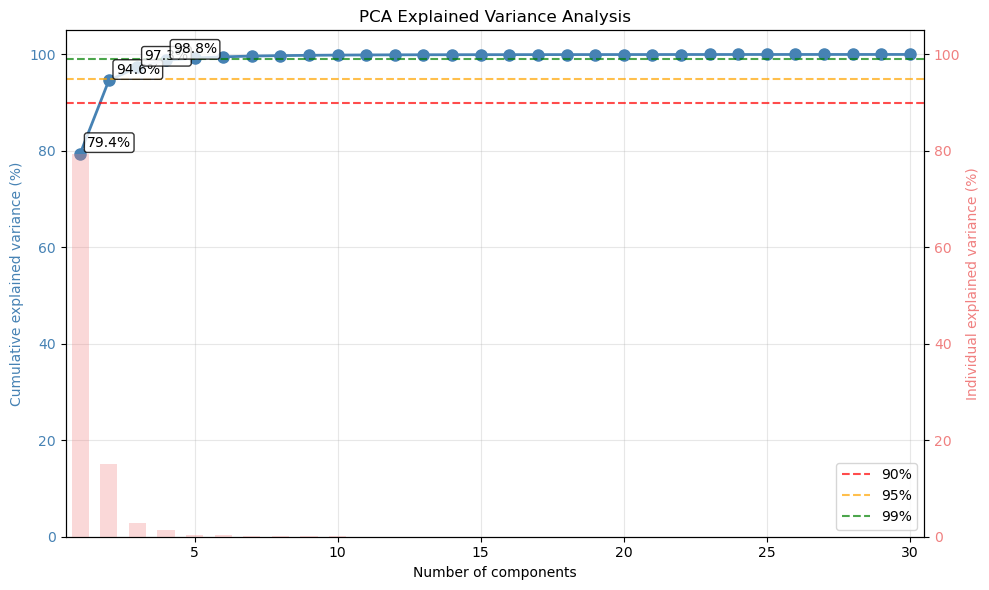

In [5]:
fig, ax = plt.subplots(figsize=(10, 6))

# plot cumulative explained variance with better styling
ax.plot(
    range(1, n_mats + 1),
    100 * explained_variance.cumsum(),
    "o-",
    linewidth=2,
    markersize=8,
    color="steelblue",
)

# add individual explained variance as bars
ax2 = ax.twinx()
ax2.bar(
    range(1, n_mats + 1),
    100 * explained_variance,
    alpha=0.3,
    color="lightcoral",
    width=0.6,
    label="Individual",
)

# add horizontal reference lines
ax.axhline(y=90, color="red", linestyle="--", alpha=0.7, label="90%")
ax.axhline(y=95, color="orange", linestyle="--", alpha=0.7, label="95%")
ax.axhline(y=99, color="green", linestyle="--", alpha=0.7, label="99%")

# annotations for first few components
for i in range(min(4, n_mats)):
    cumvar = 100 * explained_variance[: i + 1].sum()
    ax.annotate(
        f"{cumvar:.1f}%",
        xy=(i + 1, cumvar),
        xytext=(5, 5),
        textcoords="offset points",
        fontsize=10,
        bbox={"boxstyle": "round,pad=0.2", "facecolor": "white", "alpha": 0.8},
    )

# styling
ax.set_xlabel("Number of components")
ax.set_ylabel("Cumulative explained variance (%)", color="steelblue")
ax2.set_ylabel("Individual explained variance (%)", color="lightcoral")
ax.set_title("PCA Explained Variance Analysis")
ax.grid(True, alpha=0.3)
ax.legend(loc="lower right")
ax.set_xlim(0.5, n_mats + 0.5)
ax.set_ylim(0, 105)
ax2.set_ylim(0, 105)

# color the y-axis labels to match the data
ax.tick_params(axis="y", labelcolor="steelblue")
ax2.tick_params(axis="y", labelcolor="lightcoral")

plt.tight_layout()
plt.show()

# PCA (difference) out-of-sample explanation:

Here we compute PCA decomposition on a training sample and then usea the factor loadings to campare their explanatory power with out-of-sample data. 

We split the data from 2021-2024 to compute the PCA decomposition, and use 2025 to evaluate how much variance do they capture. We use 2 factors for this.

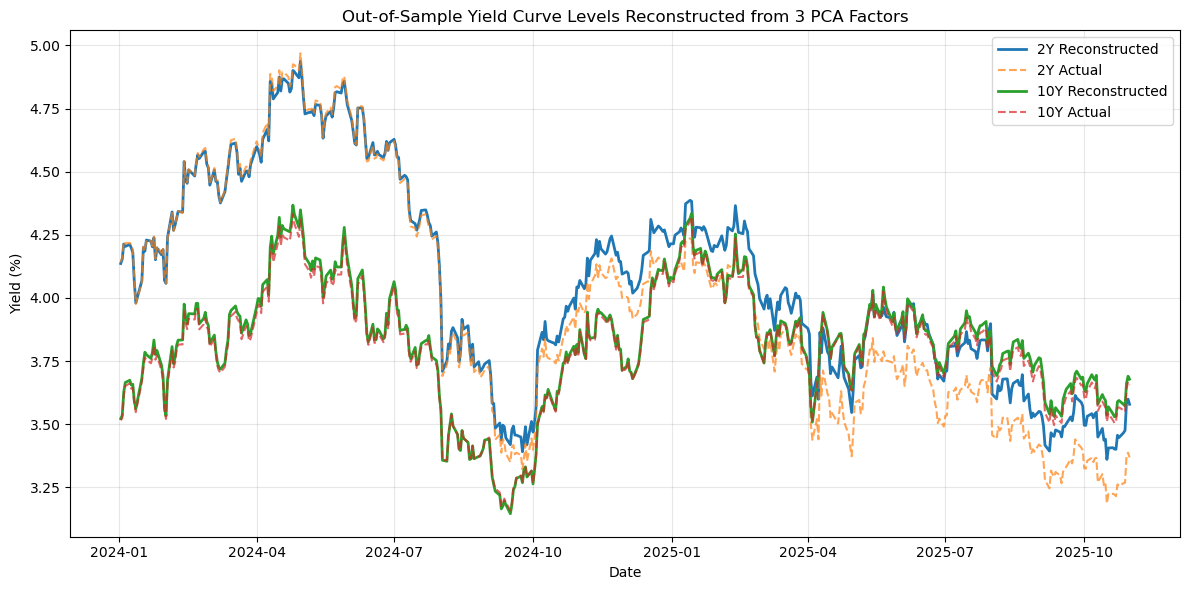

In [6]:
training_sample = spot_diff.loc["2021-01-01":"2023-12-29"]
test_sample = spot_diff.loc["2024-01-01":"2025-10-31"]
pca = PCA(n_components=3).fit(training_sample)
test_pca_projection = pca.transform(test_sample)
test_spot_diff = pca.inverse_transform(test_pca_projection)
test_spot_diff = pd.DataFrame(
    test_spot_diff, index=test_sample.index, columns=test_sample.columns
)
test_spot_levels = test_spot_diff.cumsum() + spot_df.loc["2023-12-29"].values

fig, ax = plt.subplots(figsize=(12, 6))
maturity_to_plot = ["2Y","10Y"]
for maturity in maturity_to_plot:
    ax.plot(
        test_spot_levels.index,
        test_spot_levels[maturity],
        label=f"{maturity} Reconstructed",
        linewidth=2,
    )
    ax.plot(
        test_sample.index,
        spot_df.loc["2024-01-01":"2025-10-31", maturity],
        linestyle="--",
        label=f"{maturity} Actual",
        alpha=0.7,
    )
ax.set_title("Out-of-Sample Yield Curve Levels Reconstructed from 3 PCA Factors")
ax.set_xlabel("Date")
ax.set_ylabel("Yield (%)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

#pca_projection = pca.transform(election_day_CMT.values.reshape(1, -1))[0]

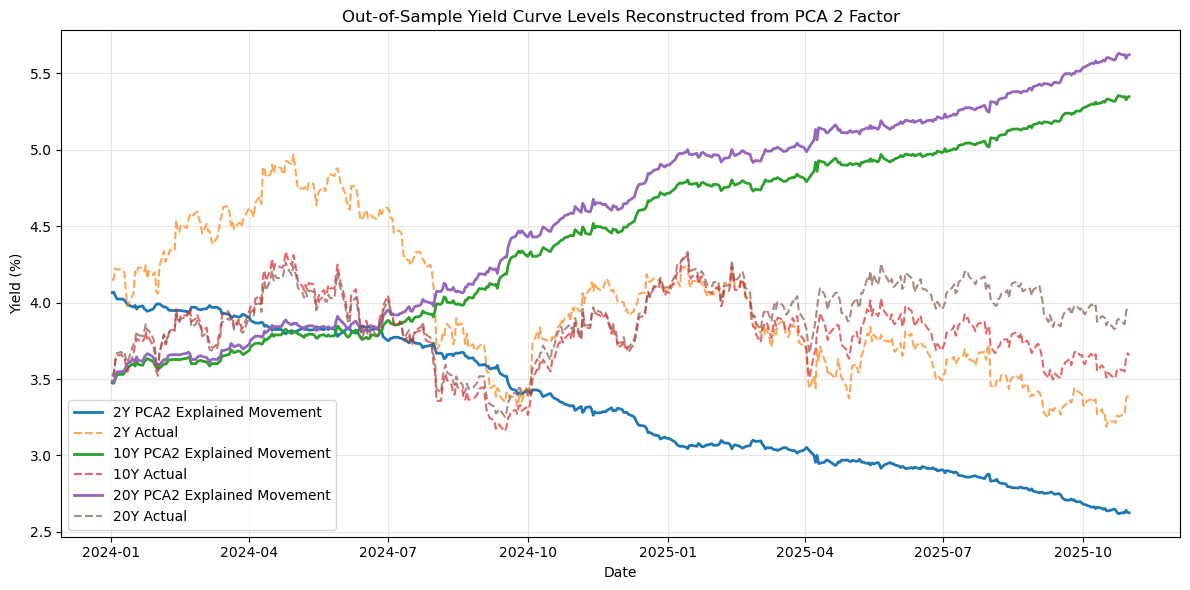

In [42]:
pca_projection = pca.transform(test_sample) # Factor Scores - Series Out-Of-Sample
loadings = pca.components_  #Eigenvalues Vectors (Factor Loadings)

selected_tenors = ['2Y', '10Y', '20Y']
all_tenors = spot_diff.columns.tolist()
selected_indices = [all_tenors.index(t) for t in selected_tenors]

factor_index = 1 #PCA 1 = 0, PCA 2 = 1, PCA 3 = 2
F2 = pca_projection[:, factor_index].reshape(-1, 1) # Series of PCA2
E_subset = loadings[factor_index, selected_indices].reshape(1, -1) # Eigenvector subset

pc2_spot_diff = np.dot(F2, E_subset)
pc2_spot_levels = pc2_spot_diff.cumsum(axis=0) + spot_df.loc["2023-12-29", selected_tenors].values

fig, ax = plt.subplots(figsize=(12, 6))
for i, maturity in enumerate(selected_tenors):
    ax.plot(
        test_spot_levels.index,
        pc2_spot_levels[:, i],
        label=f"{maturity} PCA2 Explained Movement",
        linewidth=2,
    )
    ax.plot(
        test_sample.index,
        spot_df.loc["2024-01-01":"2025-10-31", maturity],
        linestyle="--",
        label=f"{maturity} Actual",
        alpha=0.7,
    )
ax.set_title("Out-of-Sample Yield Curve Levels Reconstructed from PCA 2 Factor")
ax.set_xlabel("Date")
ax.set_ylabel("Yield (%)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

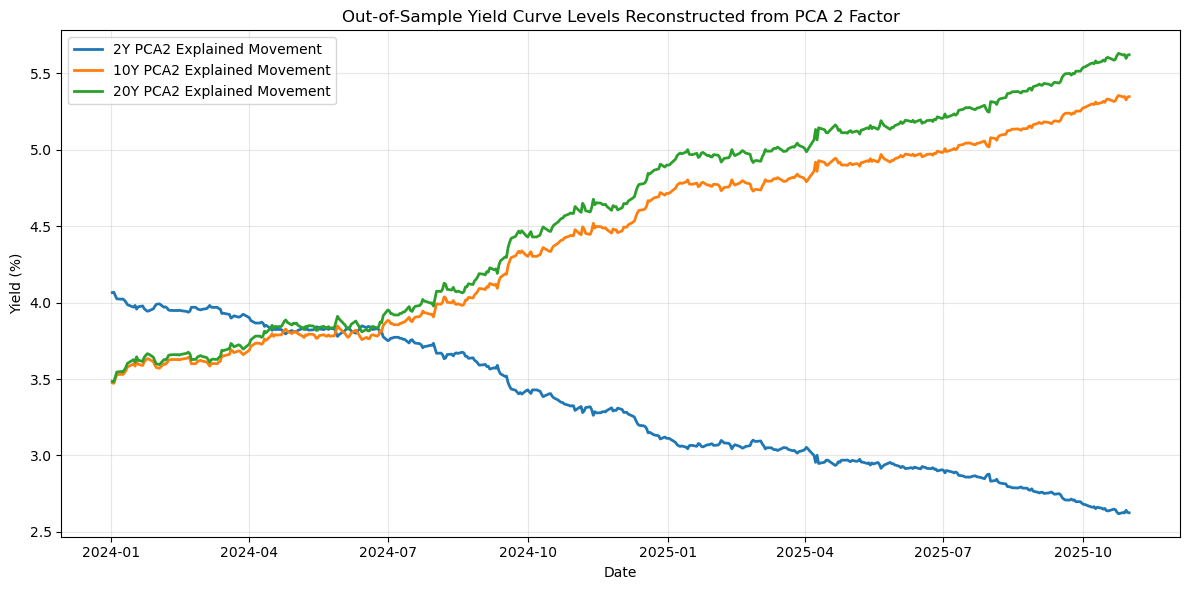

In [50]:
fig, ax = plt.subplots(figsize=(12, 6))
for i, maturity in enumerate(selected_tenors):
    ax.plot(
        test_spot_levels.index,
        pc2_spot_levels[:, i],
        label=f"{maturity} PCA2 Explained Movement",
        linewidth=2,
    )
ax.set_title("Out-of-Sample Yield Curve Levels Reconstructed from PCA 2 Factor")
ax.set_xlabel("Date")
ax.set_ylabel("Yield (%)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

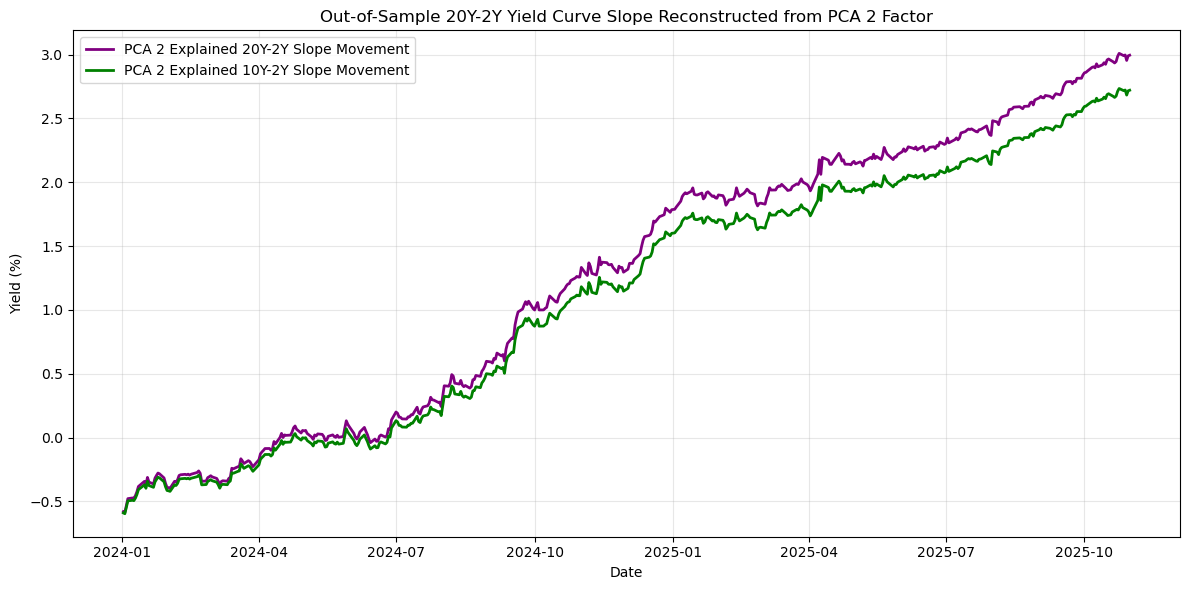

In [49]:
slope_20vs2 = pc2_spot_levels[:, 2] - pc2_spot_levels[:, 0]
slope_10vs2 = pc2_spot_levels[:, 1] - pc2_spot_levels[:, 0]
fig, ax = plt.subplots(figsize=(12, 6))
ax.plot(
    test_spot_levels.index,
    slope_20vs2,
    label="PCA 2 Explained 20Y-2Y Slope Movement",
    color="purple",
    linewidth=2,
)
ax.plot(
    test_spot_levels.index,
    slope_10vs2,
    label="PCA 2 Explained 10Y-2Y Slope Movement",
    color="green",
    linewidth=2,
)
ax.set_title("Out-of-Sample 20Y-2Y Yield Curve Slope Reconstructed from PCA 2 Factor")
ax.set_xlabel("Date")
ax.set_ylabel("Yield (%)")
ax.legend()
ax.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

### PCA on the differences

In [104]:
spot_diff = spot_df.diff(1).dropna()
n_mats = len(spot_diff.columns)
n_obs = len(spot_diff)
window_size = 252

scores_diff, daily_pca_diff = mod.rolling_pca(df=spot_diff,
                                       window_size=window_size,
                                       recalibration_period=1,
                                       columns=None,
                                       )

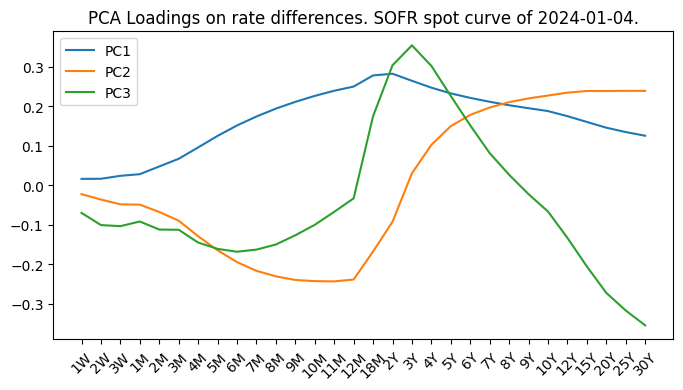

In [105]:
plt.figure(figsize=(8, 4))
date = "2024-01-04"
plt.plot(daily_pca_diff[f"{date}"]["loadings"].T)
plt.xticks(range(len(spot_df.columns)),
           labels=spot_df.columns.to_list(),
           rotation=45)
plt.title(f"PCA Loadings on rate differences. SOFR spot curve of {date}.")
plt.legend(["PC1", "PC2", "PC3"])
plt.show()



In [106]:
daily_pca_diff["2022-01-04"]["explained_var_ratio"]

array([0.89115865, 0.08066351, 0.01703509])

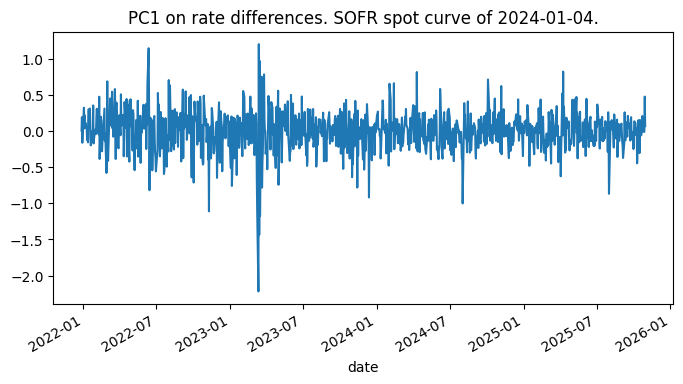

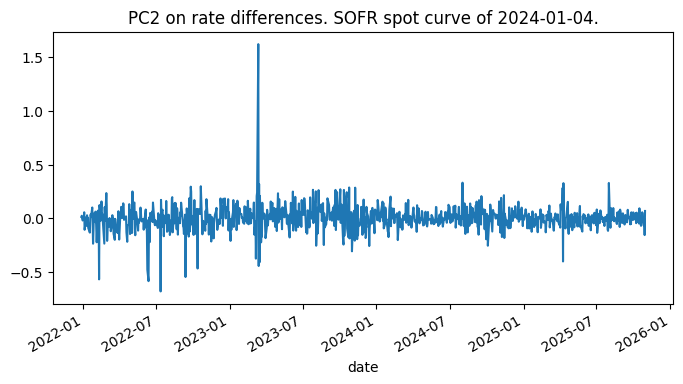

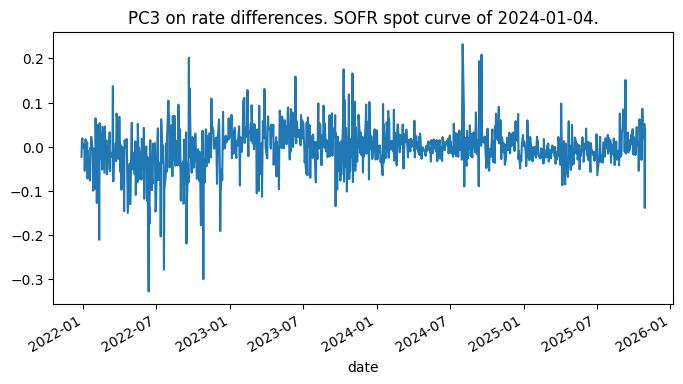

In [107]:
for i in range(1, 4):
    scores_diff[f"PC{i}"].plot(title=f"PC{i} on rate differences. SOFR spot curve of {date}.", figsize=(8,4))
    plt.show()

### PCA on the levels

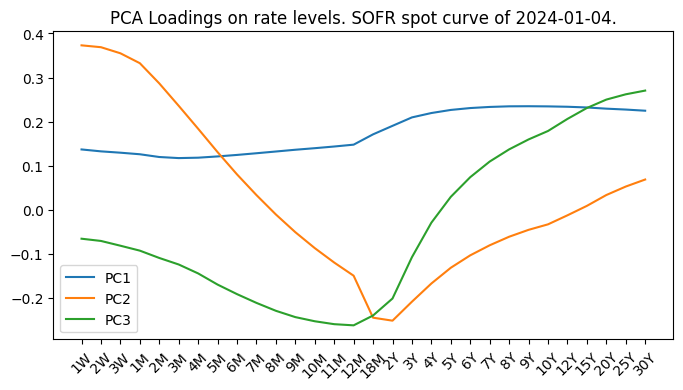

In [108]:
n_mats = len(spot_diff.columns)
n_obs = len(spot_diff)
window_size = 252
date = "2024-01-04"
scores, daily_pca = mod.rolling_pca(df=spot_df,
                                       window_size=window_size,
                                       recalibration_period=1,
                                       columns=None,
                                       )

plt.figure(figsize=(8, 4))
plt.plot(daily_pca[f"{date}"]["loadings"].T)
plt.xticks(range(len(spot_df.columns)),
           labels=spot_df.columns.to_list(),
           rotation=45)
plt.title(f"PCA Loadings on rate levels. SOFR spot curve of {date}.")
plt.legend(["PC1", "PC2", "PC3"])
plt.show()

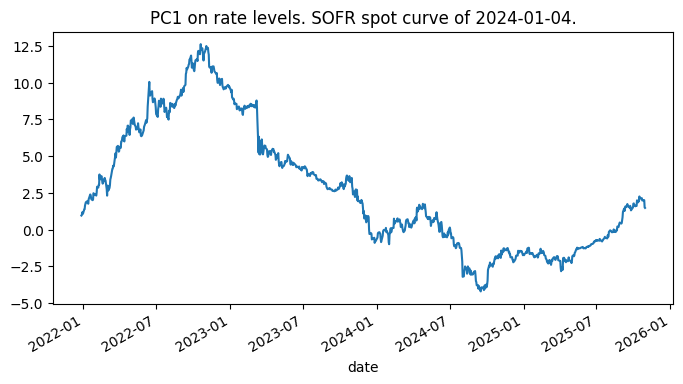

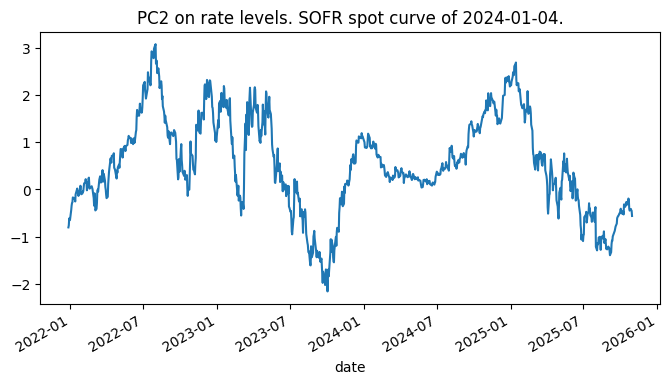

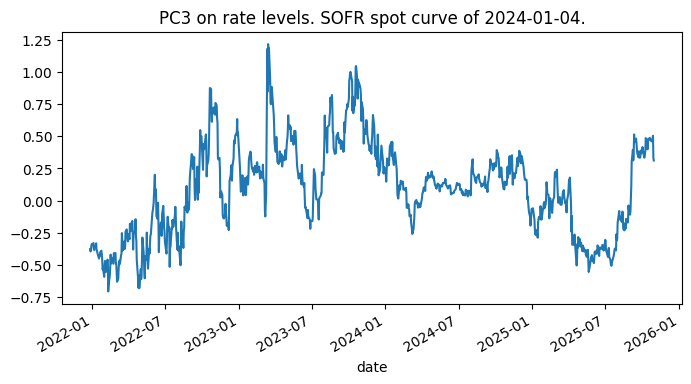

In [109]:
for i in range(1, 4):
    scores[f"PC{i}"].plot(title=f"PC{i} on rate levels. SOFR spot curve of {date}.", figsize=(8,4))
    plt.show()

### PCA on 1Y FWD Yield curve

In [110]:
fwd_df = pd.read_csv("data/1y_fwd_sofr.csv",
                      header=0,
                     )
fwd_df = fwd_df.set_index("Dates")
fwd_df = fwd_df.dropna()
fwd_df.index = pd.to_datetime(fwd_df.index, format="%d-%m-%y")
fwd_df.head()

,0D,3M,6M,1Y,2Y,3Y,4Y,5Y,10Y,15Y,30Y
Dates,,,,,,,,,,,
2021-01-01,0.06200,0.06304,0.06860,0.06200,0.14760,0.33234,0.61865,0.87957,1.51844,1.48972,1.00800
2021-01-04,0.05800,0.05572,0.05521,0.05800,0.14479,0.30243,0.57638,0.88227,1.51156,1.47574,0.98069
2021-01-05,0.05615,0.05526,0.05750,0.05984,0.16654,0.36119,0.63967,0.92864,1.50673,1.51998,0.98491
2021-01-06,0.06500,0.06640,0.07000,0.07816,0.19041,0.43177,0.72965,1.03652,1.68310,1.61474,1.05680
2021-01-07,0.06750,0.07129,0.07655,0.09882,0.24502,0.50071,0.82069,1.11989,1.72374,1.69501,1.12916


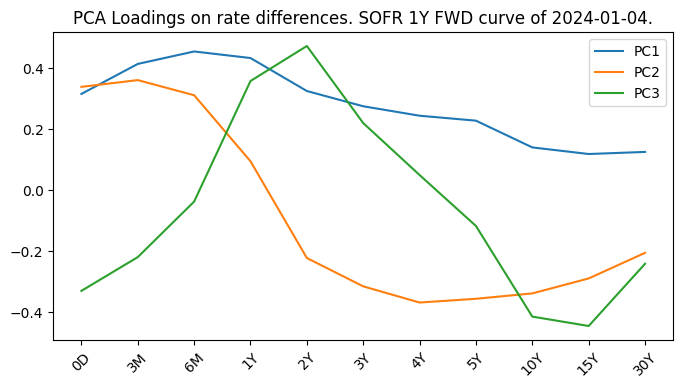

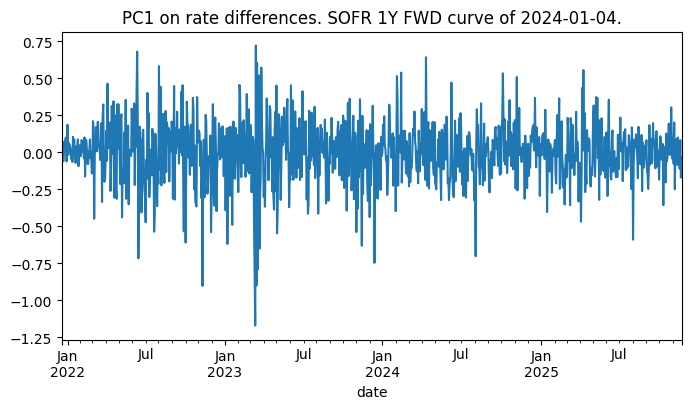

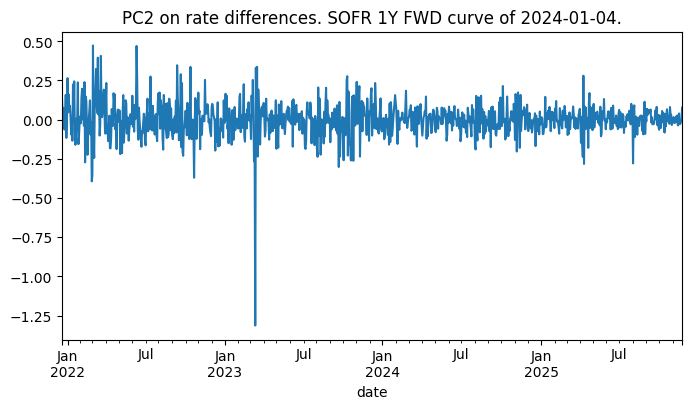

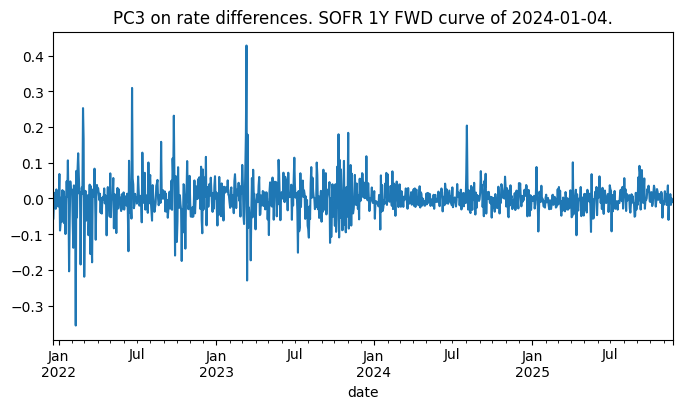

In [111]:
fwd_diff = fwd_df.diff(1).dropna()
n_mats = len(fwd_diff.columns)
n_obs = len(fwd_diff)
window_size = 252
date = "2024-01-04"

scores_fwd_diff, daily_pca_fwd_diff = mod.rolling_pca(df=fwd_diff,
                                              window_size=window_size,
                                              recalibration_period=1,
                                              columns=None,
                                              )
plt.figure(figsize=(8, 4))
plt.plot(daily_pca_fwd_diff[f"{date}"]["loadings"].T)
plt.xticks(range(len(fwd_df.columns)),
           labels=fwd_df.columns.to_list(),
           rotation=45)
plt.title(f"PCA Loadings on rate differences. SOFR 1Y FWD curve of {date}.")
plt.legend(["PC1", "PC2", "PC3"])
plt.show()

for i in range(1, 4):
    scores_fwd_diff[f"PC{i}"].plot(title=f"PC{i} on rate differences. SOFR 1Y FWD curve of {date}.", figsize=(8,4))
    plt.show()

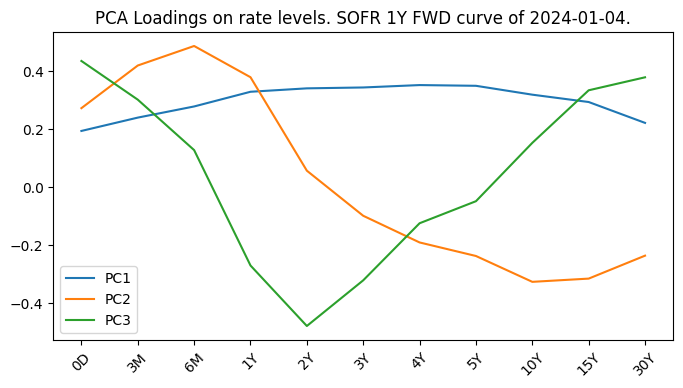

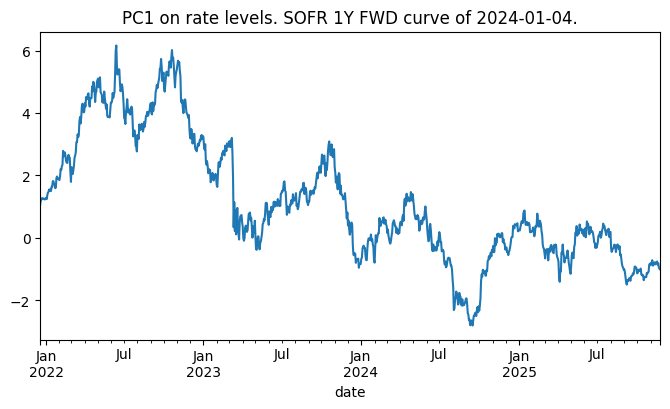

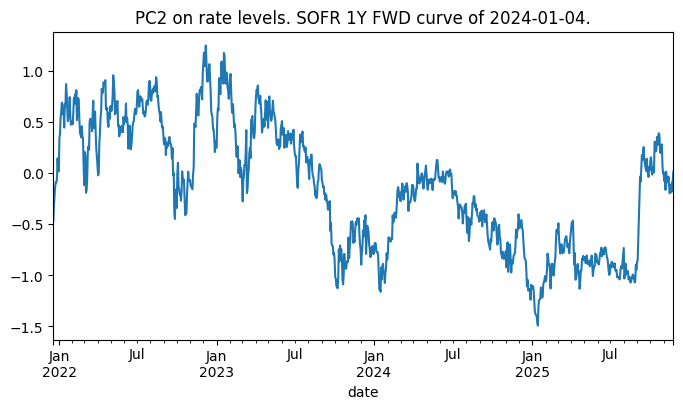

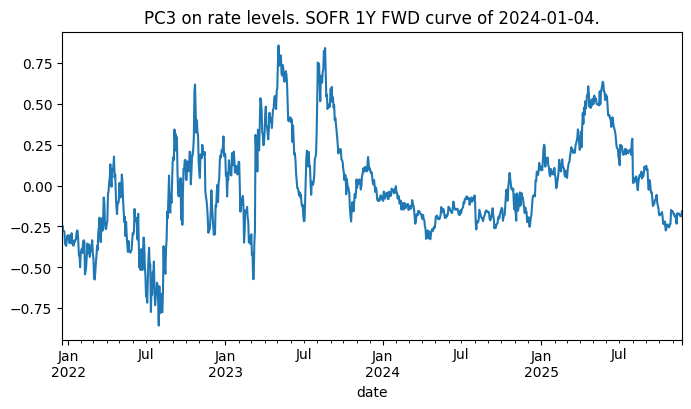

In [112]:
scores_fwd, daily_pca_fwd = mod.rolling_pca(df=fwd_df,
                                              window_size=window_size,
                                              recalibration_period=1,
                                              columns=None,
                                              )
plt.figure(figsize=(8, 4))
plt.plot(daily_pca_fwd[f"{date}"]["loadings"].T)
plt.xticks(range(len(fwd_df.columns)),
           labels=fwd_df.columns.to_list(),
           rotation=45)
plt.title(f"PCA Loadings on rate levels. SOFR 1Y FWD curve of {date}.")
plt.legend(["PC1", "PC2", "PC3"])
plt.show()

for i in range(1, 4):
    scores_fwd[f"PC{i}"].plot(title=f"PC{i} on rate levels. SOFR 1Y FWD curve of {date}.", figsize=(8,4))
    plt.show()